# 1.背包问题的贪婪算法

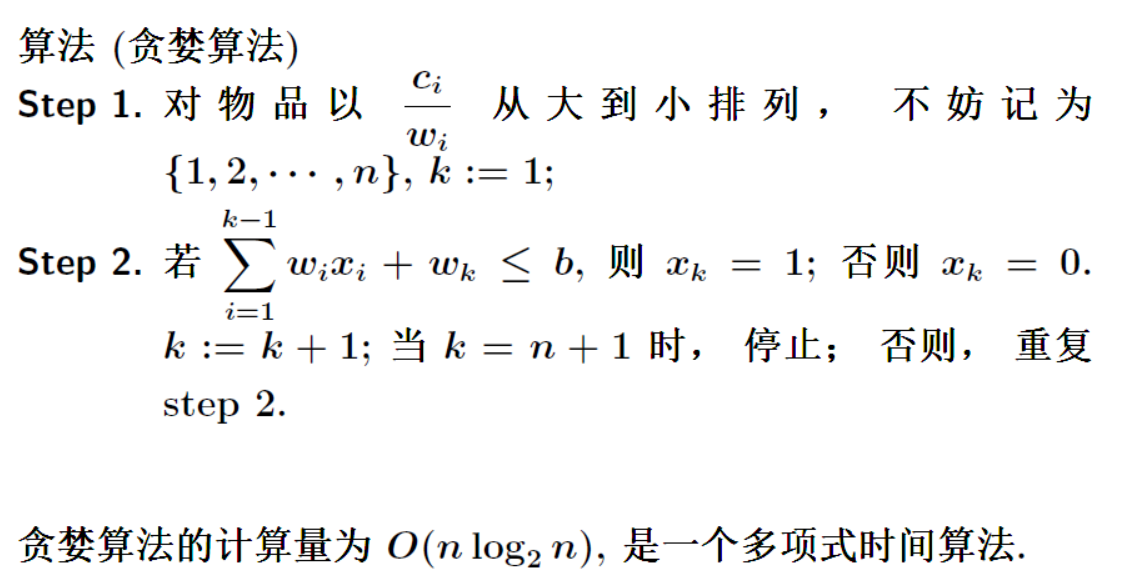

In [18]:
m = eval(input('可承载的最大重量：'))
h = eval(input('宝物重量：'))
v = eval(input('宝物价值：'))
 
# 计算权重, 整合得到一个数组
arr = [(i,v[i]/h[i], h[i], v[i]) for i in range(len(h))]
 
# 按照list中的权重，从大到小排序
arr.sort(key=lambda x:x[1], reverse=True)  # list.sort() list排序函数
 
bagVal = 0
bagList = []
for i,w,h,v in arr:
    # 1 如果能放的下宝物，那就把宝物全放进去
    if w <= m:
        m -= h
        bagVal += v
        bagList.append(i)
    
    # 2 如果宝物不能完全放下，考虑放入部分宝物
    else:
        bagVal += m * w
        bagList.append(i)
        break
 
print('\n排序后：',arr)
print('能运走的最大价值：%.2f'%bagVal,'此时承载的宝物有：',bagList)

可承载的最大重量：12
宝物重量：[1,3,5,7]
宝物价值：[2,3,2,4]

排序后： [(0, 2.0, 1, 2), (1, 1.0, 3, 3), (3, 0.5714285714285714, 7, 4), (2, 0.4, 5, 2)]
能运走的最大价值：11.00 此时承载的宝物有： [0, 1, 3, 2]


# 2.退火算法解决TSP问题

[17 10 20 47 11  1 31  0  3 24 22 32 14 18 16 45 12  9 42 28 48 49 41 44
  7 13 39 15 34 38 36 19 46 29 33 43  4  8 26  2 30 21  6  5 37 25 27 35
 23 40] 19.9180624405874 19.9180624405874


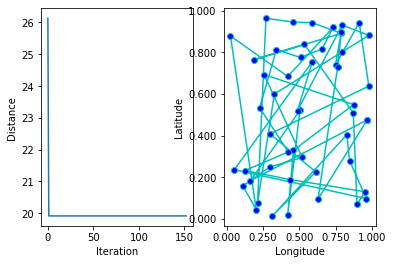

In [23]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

num_points = 50

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])



from sko.SA import SA_TSP

sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=100, T_min=1, L=10 * num_points)

best_points, best_distance = sa_tsp.run()
print(best_points, best_distance, cal_total_distance(best_points))





from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 2)

best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(sa_tsp.best_y_history)
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Distance")
ax[1].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
plt.show()


# 3.模拟退火求解背包问题

In [30]:
#coding:gbk
import random
import math
global m,C;    # m个物品 ,背包容量C
global time,balance;    #  time 迭代次数, balance  平衡次数
global best,T,af;   #best 记录全局最优  T 温度  af退火率
m=10; T=200.0; af =0.95;
time =10;  balance = 100; 
best_way=[0]*m;   now_way=[0]*m  #  best_way 记录全局最优解方案   now_way 记录当前解方案  
weight=[95, 4, 60, 32, 23, 72, 80, 62,65, 46]; value=[55, 10, 47, 5, 4, 50, 8, 61,85, 87]
 
def cop(a,b,le):     #复制函数 把b数组的值赋值a数组
    for i in range(le):
        a[i]=b[i]
def calc(x):  #计算背包价值
    global C,wsum;
    vsum=0;wsum=0;
    for i in range(m):
        vsum +=x[i]*value[i];  wsum += x[i]*weight[i];    
    return  vsum;
def produce():  #初始产生随机解
    while (1>0):
        for k in range(m):
            if(random.random() < 0.5):  now_way[k]=1;
            else: now_way[k]=0;
        calc(now_way)
        if(wsum <C): break;
    global best;
    best=calc(now_way);
    cop(best_way,now_way,m);
 
def init():   #初始化函数
    global C,best,T;
    C = 269;
    best=-1;
    produce()    #产生初始解
def get(x):      #随机将背包中已经存在的物品取出
    while(1>0):
        ob = random.randint(0,m-1);
        if(x[ob]==1): x[ob]=0;break;
def put(x):      #随机放入背包中不存在的物品
    while(1>0):
        ob = random.randint(0,m-1);
        if(x[ob]==0): x[ob]=1;break;       
def slove():  #迭代函数
    global best,T,balance;
    test=[0]*m;
    now = 0;   #当前背包价值
    for i in range(balance):
        now = calc(now_way);
        cop(test,now_way,m);
        ob = random.randint(0,m-1); #随机选取某个物品
        if(test[ob]==1): put(test);test[ob]=0;  #在背包中则将其拿出，并加入其它物品
        else:   #不在背包中则直接加入或替换掉已在背包中的物品
            if(random.random()<0.5):test[ob]=1; 
            else : get(test); test[ob]=1;
        temp= calc(test);
        if(wsum>C):continue;    # 非法解则跳过
        if(temp > best): best=temp; cop(best_way,test,m);     #更新全局最优
        
        if(temp > now): cop(now_way,test,m);       #直接接受新解 
        else:
            g = 1.0*(temp-now)/T;
            if(random.random() < math.exp(g)):   #概率接受劣解
                cop(now_way,test,m);    
                
#*****************************主函数**********************        
init();
isGood = 0;
for i in range(time):      
    slove();
    T = T*af;    #温度下降
    if(best==300):  
        print('找到最优解:295,迭代次数',i+1); isGood = 1;  break;    #达到最优解提前退出
        
if(isGood == 0):   print('只找到次优解:',best,'迭代次数',time);
print('方案为：',best_way);               #打印方案

只找到次优解: 295 迭代次数 10
方案为： [0, 1, 1, 1, 0, 0, 0, 1, 1, 1]


# 4.组合优化问题的求解

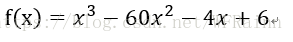

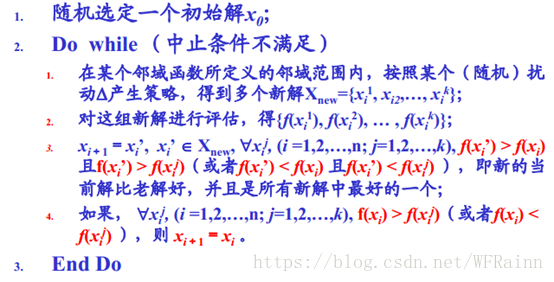

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
39.83281490227871 -32151.658881161853


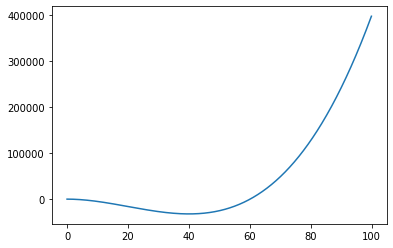

In [29]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import math
 
#define aim function
def aimFunction(x):
    y=x**3-60*x**2-4*x+6
    return y
x=[i/10 for i in range(1000)]
y=[0 for i in range(1000)]
for i in range(1000):
    y[i]=aimFunction(x[i])
 
plt.plot(x,y)



T=1000 #initiate temperature
Tmin=10 #minimum value of terperature
x=np.random.uniform(low=0,high=100)#initiate x
k=50 #times of internal circulation 
y=0#initiate result
t=0#time
while T>=Tmin:
    for i in range(k):
        #calculate y
        y=aimFunction(x)
        #generate a new x in the neighboorhood of x by transform function
        xNew=x+np.random.uniform(low=-0.055,high=0.055)*T
        if (0<=xNew and xNew<=100):
            yNew=aimFunction(xNew)
            if yNew-y<0:
                x=xNew
            else:
                #metropolis principle
                p=math.exp(-(yNew-y)/T)
                r=np.random.uniform(low=0,high=1)
                if r<p:
                    x=xNew
    t+=1
    print(t)
    T=1000/(1+t)
    
print (x,aimFunction(x))

# 5.遗传算法求解tsp

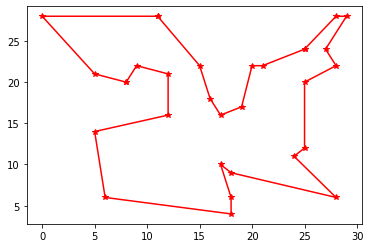

137.157
[0, 18, 29, 21, 11, 13, 9, 16, 7, 22, 6, 26, 14, 10, 12, 2, 8, 3, 28, 27, 1, 25, 23, 24, 5, 19, 4, 17, 20, 15]


In [31]:
#coding:gbk
import random
import math
import matplotlib.pyplot as plt
global n,m,pc,pm,best;
pc = 0.9;pm=0.2;     #pc为交配概率 pm为变异概率
best = 10000;           #best记录最优距离，初始化无限大
n=10;m=30;          #n:样本个数    m:城市个数
dna = [[0]*(m) for i in range(n)]   #开辟n*m的数组
value = [0.0]*n;                        #value数组记录个体适应度
way =[0]*m;                          #way数组记录最优解路线
class no:                       #该类表示每个点的坐标
    def __init__(self,x,y):
        self.x=x;
        self.y=y;
p=[];
def draw(t):              #该函数用于描绘路线图
    x=[0]*(m+1);y=[0]*(m+1);
    for i in range(m):
        x[i] =p[t[i]].x;
        y[i] =p[t[i]].y;
    x[m] =p[t[0]].x;
    y[m] =p[t[0]].y;
    plt.plot(x,y,color='r',marker='*' ); 
    plt.show();
   
def  variation(x):   # 变异操作函数
    x1 = [0]*m;
    for i in range(m):
        x1[i] = x[i];
    a =random.randint(0,m-1);    #随机出两个点进行倒置
    b = random.randint(0,m-1);
    if(a > b): a,b=b,a;
    le = b-a+1;
    for i in range(le):
        x[a+i]=x1[b-i];
def  mycol():                           #城市坐标输入
        p.append(no( 8 , 20 ));
        p.append(no( 28 , 6 )); p.append(no( 27 , 24 )); p.append(no( 25 , 20 )); p.append(no( 5 , 14 )); p.append(no( 18 , 4 )); p.append(no( 21 , 22 ));
        p.append(no( 19 , 17 )); p.append(no( 28 , 22 )); p.append(no( 16 , 18 )); p.append(no( 28 , 28 )); p.append(no( 11 , 28 )); p.append(no( 29 , 28 ));
        p.append(no( 15 , 22 )); p.append(no( 25 , 24 )); p.append(no( 9 , 22 )); p.append(no( 17 , 16 )); p.append(no( 12 , 16 )); p.append(no( 5 , 21 ));
        p.append(no( 6 , 6 )); p.append(no( 12 , 21 )); p.append(no( 11 , 28 )); p.append(no( 20 , 22 )); p.append(no( 17 , 10 )); p.append(no( 18 , 6 ));
        p.append(no( 18 , 9 )); p.append(no( 25 , 24 )); p.append(no( 24 , 11 )); p.append(no( 25 , 12 )); p.append(no( 0 , 28 ));
 
def   init():        #初始化函数 随机产生初始个体
    vis = [0]*m;
    num=0;
    for i in range(n):
        for j in range(m):
            vis[j] = 0;
        for j in range(m):      
            num = random.randint(0,m-1);
            while(vis[num] == 1):
                num = random.randint(0,m-1);
            vis[num]=1;dna[i][j]=num;
def get_value(t):        #适应度计算
    ans = 0.0;
    for i in range(1,m):     #两点距离公式
        ans += math.sqrt((p[t[i]].x-p[t[i-1]].x) *(p[t[i]].x-p[t[i-1]].x)  +(p[t[i]].y-p[t[i-1]].y) *(p[t[i]].y-p[t[i-1]].y));
    ans +=  math.sqrt((p[t[0]].x-p[t[m-1]].x) * (p[t[0]].x-p[t[m-1]].x)  +(p[t[0]].y-p[t[m-1]].y) *(p[t[0]].y-p[t[m-1]].y));
    return ans;
def find(x,a,b,num):     #交叉算子运算时判断是否出现重复的城市id 
    for i in range(a,b+1):
        if(num[i] == x):
            return i;
    return -1;
    
def swap(x, y):         #有序交叉法
    x1 =  [0]*m;  y1 =  [0]*m;
    for i in range(m):
        x1[i]=x[i];y1[i]=y[i];
    a =  random.randint(0,m-1);    #随机产生两个点
    b = random.randint(0,m-1);
    if(a > b): a,b=b,a;
    for i in range(a):      #交叉运算
        x1[i]=y[i];y1[i]=x[i];
    for i in range(b+1,m):
        x1[i]=y[i];y1[i]=x[i];
    ob = 0;
    for i in range(m):       #判断交叉的合法性并进行维护，直到交叉成功
        if(i>= a and i<= b):
            continue;
        ob = find(x1[i],a,b,x1);
        while(ob != -1):
            x1[i] = y1[ob];
            ob = find(x1[i],a,b,x1);
    for i in range(m):     #操作同上，维护另一新个体的交叉合法性。
        if(i>= a and i<= b):
            continue;
        ob = find(y1[i],a,b,y1);
        while(ob != -1):
            y1[i] = x1[ob];
            ob = find(y1[i],a,b,y1);
    for i in range(m):
        x[i]=x1[i];y[i]=y1[i];
     
def slove():         #总执行函数
    global best;    #记录最短距离
    for i in range(n):
        value[i]=get_value(dna[i]);
    max_id = value.index(max(value));   #最优解与最差解个体的id被记录
    min_id = value.index(min(value));
    if(value[min_id] < best):
        best = value[min_id];
        for i in range(m):
            way[i] = dna[min_id][i];
    value[max_id] = value[min_id];  #最优解覆盖最差解
    fa = -1;
    for i in range(m):            
        dna[max_id][i]=dna[min_id][i];
    for i in range(n):                #开始交配
        if(random.random()> pc or i == max_id or i == min_id):
            continue;
        if(fa == -1):
            fa = i;
        else :
            swap(dna[fa], dna[i]);
            fa = -1;
    for i in range(n):              #变异运算
        if(random.random()> pm or i == max_id or i == min_id):
            continue;
        variation(dna[i]);
 
mycol();            #数据输入    
init();                 #群体初始化
for i in range(1000):      #控制进化次数
    slove();
draw(way);                      #画图描绘路线
print(round(best,3));       #打印距离
print(way);                     #打印路线，以序列表示

# 6.遗传算法求解函数sin(x) + cos(x)最大值

第0   次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 1 0], 其适应度(找到的函数最大值)是: 1.414112
第100 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 1], 其适应度(找到的函数最大值)是: 1.413121
第200 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 1 0 1], 其适应度(找到的函数最大值)是: 1.410743
第300 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第400 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第500 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第600 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 1 0], 其适应度(找到的函数最大值)是: 1.414112
第700 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 1 0 0 0 0], 其适应度(找到的函数最大值)是: 1.397886
第800 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第900 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 1], 其适应度(找到的函数最大值)是: 1.413121
第1000次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 1 0 0], 其适应度(找到的函数最大值)是: 1.412923
第1100次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第1200次进化后, 基因(fitness_score)

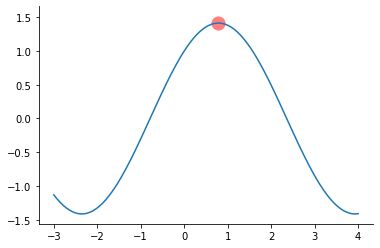

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 找到函数f(x)在区间self.x_bounder上的最大值
def f(x):
    return np.sin(x) + np.cos(x)


class GeneticAlgorithm(object):
    """遗传算法.

    Parameters:
    -----------
    cross_rate: float
        交配的可能性大小.
    mutate_rate: float
        基因突变的可能性大小. 
    n_population: int
        种群的大小.
    n_iterations: int
        迭代次数.
    DNA_size: int
        DNA的长度.
    x_bounder: list
        x 轴的区间, 用遗传算法寻找x在该区间中的最大值.
    """
    def __init__(self, cross_rate, mutation_rate, n_population, n_iterations, DNA_size):
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.n_population = n_population
        self.n_iterations = n_iterations
        self.DNA_size = 8                            # DNA的长度
        self.x_bounder = [-3, 4]


    # 初始化一个种群
    def init_population(self):
        population = np.random.randint(low=0, high=2, size=(self.n_population, self.DNA_size)).astype(np.int8)
        return population

    # 将种群中的每个个体的DNA由二进制转换成十进制
    def transformDNA(self, population):
        population_decimal = ( (population.dot(np.power(2, np.arange(self.DNA_size)[::-1])) / np.power(2, self.DNA_size) - 0.5) * 
                               (self.x_bounder[1] - self.x_bounder[0]) + 0.5 * (self.x_bounder[0] + self.x_bounder[1])  )
        return population_decimal

    # 计算种群中每个个体的适应度，适应度越高，说明该个体的基因越好
    def fitness(self, population):
        transform_population = self.transformDNA(population)
        fitness_score = f(transform_population)
        return fitness_score - fitness_score.min()  # 在select函数中按照个体的适应度进行抽样的的时候，抽样概率值必须是非负的

    # 对种群按照其适应度进行采样，这样适应度高的个体就会以更高的概率被选择
    def select(self, population, fitness_score):
        fitness_score = fitness_score + 1e-4     # 下一步抽样的过程中用到了除法，出现除法就要考虑到分母为0的特殊情况
        idx = np.random.choice(np.arange(self.n_population), size=self.n_population, replace=True, p=fitness_score/fitness_score.sum())
        return population[idx]

    # 进行交配
    def create_child(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            index = np.random.randint(0, self.n_population, size=1)
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)
            parent[cross_points] = pop[index, cross_points]
        return parent

    # 基因突变
    def mutate_child(self, child):
        for i in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                child[i] = 1
            else:
                child[i] = 0
        return child

    # 进化
    def evolution(self):
        population = self.init_population()
        for i in range(self.n_iterations):
            fitness_score = self.fitness(population)
            best_person = population[np.argmax(fitness_score)]

            if i%100 == 0:
                print(u'第%-4d次进化后, 基因(fitness_score)最好的个体是: %s, 其适应度(找到的函数最大值)是: %f' % (i, best_person, 
                                                                                f(self.transformDNA(best_person)) ) )

            population = self.select(population, fitness_score)
            population_copy = population.copy()

            for parent in population:
                child = self.create_child(parent, population_copy)
                child = self.mutate_child(child)
                parent[:] = child

            population = population

        self.best_person = best_person

def main():
    ga = GeneticAlgorithm(cross_rate=0.9, mutation_rate=0.1, n_population=300, n_iterations=2000, DNA_size=8)
    ga.evolution()

    # 绘图
    x = np.linspace(start=ga.x_bounder[0], stop=ga.x_bounder[1], num=200)
    plt.plot(x, f(x))
    plt.scatter(ga.transformDNA(ga.best_person), f(ga.transformDNA(ga.best_person)), s=200, lw=0, c='red', alpha=0.5)
    ax = plt.gca()

    ax.spines['right'].set_color('none')  # 去掉右侧的轴
    ax.spines['top'].set_color('none')    # 去掉上方的轴

    ax.xaxis.set_ticks_position('bottom') # 设置x轴的刻度仅在下方显示
    ax.yaxis.set_ticks_position('left')   # 设置y轴的刻度仅在左边显示
    plt.show()

if __name__ == '__main__':
    main()


# 7.蚁群算法求解TSP

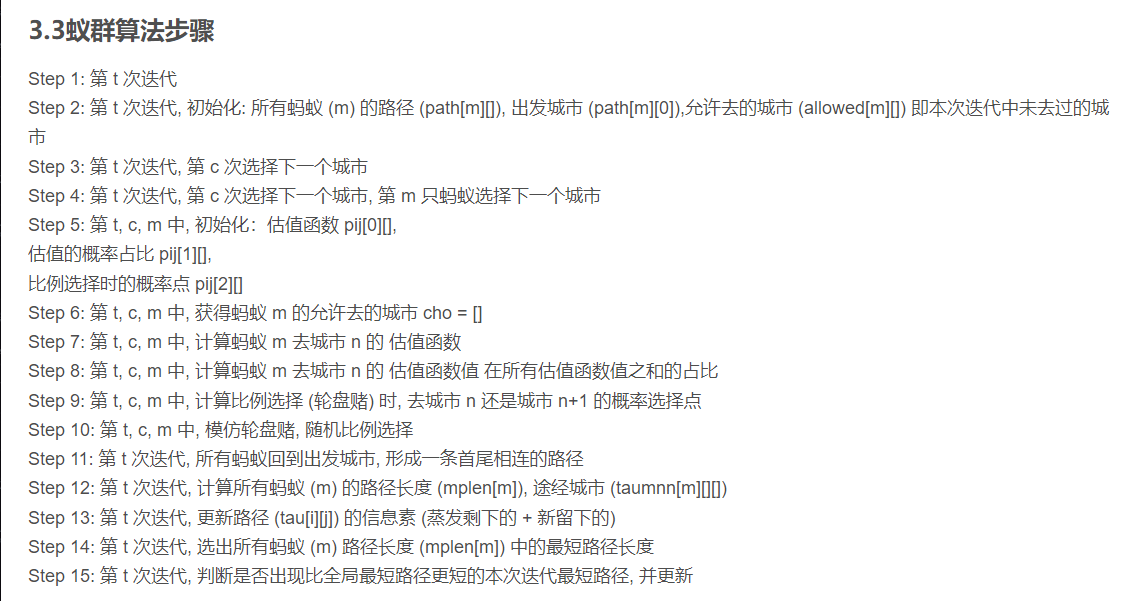

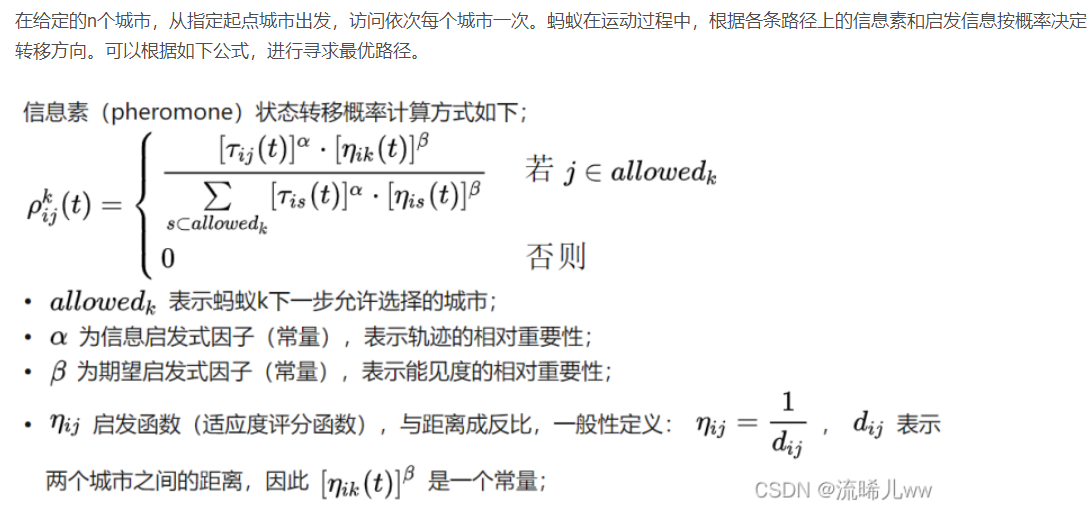

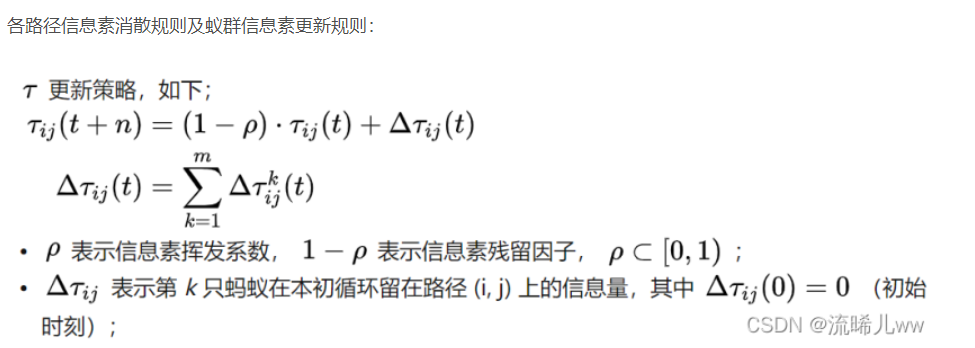

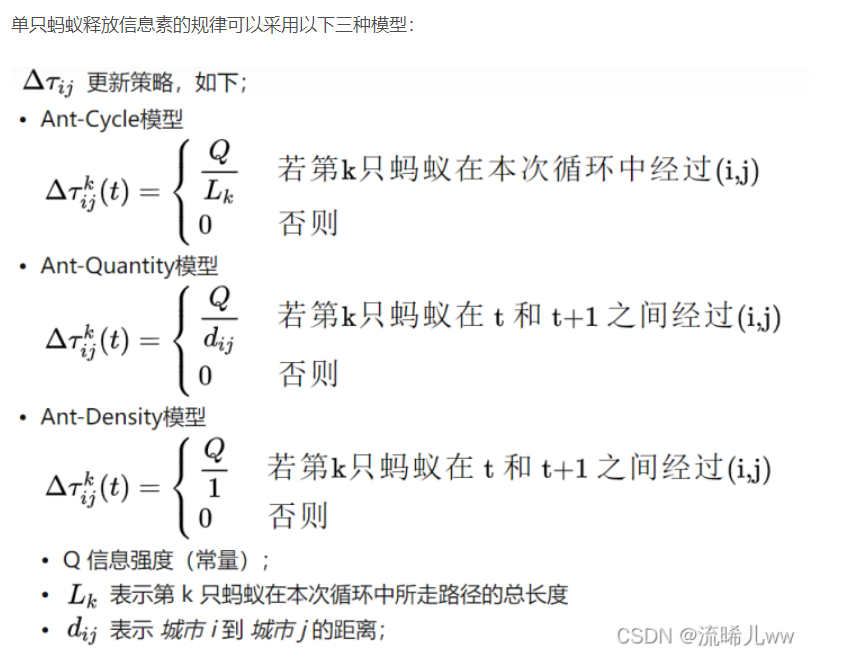

  0 434.0451985466194
  1 520.7995335185204
  2 458.3245699640378
  3 444.9510922387695
  4 427.4494388643026
  5 410.4820891818666
  6 421.66794113880604
  7 364.9281116208073
  8 352.93963225066454
  9 330.9901104609526
 10 339.64728786634294
 11 338.6665675890607
 12 375.02915176627897
 13 338.174455928852
 14 338.17445592885207
 15 331.4822221211613
 16 343.80364782356753
 17  358.92199233364
 18 336.7241406784036
 19 338.1744559288521
 20 336.7241406784035
 21 345.19966011608653
 22 330.9901104609527
 23 331.4822221211614
 24 331.4822221211614
 25 331.4822221211614
 26 331.4822221211613
 27 331.4822221211614
 28 330.9901104609526
 29 331.4822221211613
 30 330.9901104609527
 31 331.4822221211613
 32 330.9901104609526
 33 330.9901104609526
 34 330.9901104609527
 35 330.9901104609526
 36 330.9901104609527
 37 330.9901104609527
 38 331.4822221211613
 39 330.9901104609527
 40 330.9901104609526
 41 330.9901104609526
 42 330.9901104609527
 43 331.4822221211613
 44 330.9901104609527
 45 3

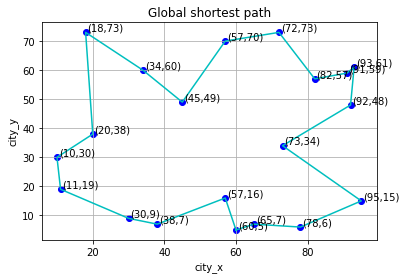

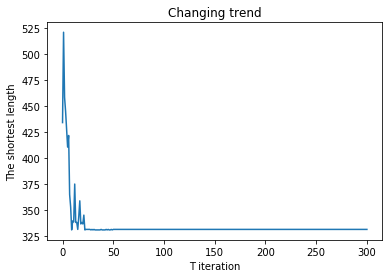

In [3]:
# -*- coding: utf-8 -*-
import math
import random
import copy
import matplotlib.pyplot as plt

# 地图长度
L = 100
# 地图高度
H = 80
# 城市个数
N = 20
# 蚂蚁个数
M = 20
# 迭代次数
T = 300

# 地图的对角线长度
LH = int(math.sqrt(L * L + H * H))

# 信息素的加权值
alpha = 1
# 能见度的加权值
beta = 2
# 信息素的蒸发率
rho = 0.5

# 城市的横坐标
city_x = [0 for n in range(N)]
# 城市的纵坐标
city_y = [0 for n in range(N)]

# 城市i和城市j之间的距离
distance = [[0 for j in range(N)] for i in range(N)]
# 能见度, 两点之间距离的倒数, 启发信息函数
eta = [[0 for j in range(N)] for i in range(N)]

# 当前时刻, 城市i和城市j之间的道路上信息素的值
tau = [[0 for j in range(N)] for i in range(N)]

# pathlen[t] 第 t 次迭代后得出的路径长度
pathLen = []
# pathCity[t] 第 t 次迭代后得出的路径
pathCity = []

# 第 best[0] 次迭代的路径最短, 全局最短路径的编号
best = [0]
# 全局最短路径上依次经过的城市的横坐标
X = []
# 全局最短路径上依次经过的城市的纵坐标
Y = []


# 初始化
# Step 1: 随机生成所有城市的坐标 (city_x, city_y)
# Step 2: 计算任意两城市之间的距离 (distance) 和能见度 (eta)
# Step 3: 用贪婪算法得出初始路径
# Step 4: 计算得出并记录所有路径的信息素浓度(tau)

def init():
    # ------------------------------------------- Step 1
    # 遍历所有城市
    for n in range(N):
        # 随机横坐标
        x = random.randint(0, L - 1)
        # 随机纵坐标
        y = random.randint(0, H - 1)
        # 记录城市 n 的横坐标
        city_x[n] = x
        # 记录城市 n 的纵坐标
        city_y[n] = y
    # ------------------------------------------- Step 2
    # 从城市 i 出发
    for i in range(N):
        # 到达城市 j
        for j in range(N):
            # 城市 i 和城市 j 之间的距离
            dij = math.pow(city_x[i] - city_x[j], 2)
            dij = dij + math.pow(city_y[i] - city_y[j], 2)
            dij = math.sqrt(dij)
            # 记录两城市之间的距离
            distance[i][j] = dij
            # 计算能见度
            # 如果 i 等于 j
            if i == j:
                # 城市到自己的能见度为 0
                eta[i][j] = 0
            else:
                # 两城市之间的能见度为两城市之间距离的倒数
                eta[i][j] = 1 / dij
    # ------------------------------------------- Step 3
    # 允许去的城市, 即未去过的城市
    # 0: 不允许, 1: 允许
    allow = [1 for n in range(N)]
    # 假设：从城市0出发
    allow[0] = 0
    # 路径
    apath = [0]
    # 当前位置
    apos = 0
    # 下一步去的城市
    acity = 0
    # 与下一个城市的距离
    away = 0
    # 总路径长度
    alen = 0
    #  第 c 次去往下一个城市
    for c in range(N - 1):
        # 设置去往下一个城市的距离, 最大值
        away = LH
        # 选择去往哪一个城市
        for n in range(N):
            # 如果允许去城市 n
            if allow[n] == 1:
                # 如果去城市 n 的距离 小于 当前要去的城市的距离
                if distance[apos][n] < away:
                    # 更新要去的城市
                    acity = n
                    # 更新要去的城市的距离
                    away = distance[apos][n]
        # 更新所在的位置
        apos = acity
        # 更新路径
        apath.append(apos)
        # 更新总路径长度
        alen = alen + away
        # 更新允许去的城市
        allow[apos] = 0
    # 回到出发点
    apath.append(0)
    # 更新总路径长度
    alen = alen + distance[apos][0]
    # 添加初始路径长度
    pathLen.append(alen)
    # 添加初始路径经过的城市
    pathCity.append(copy.deepcopy(apath))
    # ------------------------------------------- Step 4
    # 获得信息素的初始浓度值
    tau0 = M / alen
    # 设置所有城市之间路径的信息素浓度
    for i in range(N):
        for j in range(N):
            tau[i][j] = tau0
    # 城市到本身无路径, 信息素浓度为 0
    for n in range(N):
        tau[n][n] = 0


# 多次迭代
# Step  1: 第 t 次迭代
# Step  2: 第 t 次迭代, 初始化: 所有蚂蚁 (m) 的路径 (path[m][]), 出发城市 (path[m][0]),
#                              允许去的城市 (allowed[m][]) 即本次迭代中未去过的城市
# Step  3: 第 t 次迭代, 第 c 次选择下一个城市
# Step  4: 第 t 次迭代, 第 c 次选择下一个城市, 第 m 只蚂蚁选择下一个城市
# Step  5: 第 t, c, m 中, 初始化：估值函数          pij[0][],
#                               估值的概率占比     pij[1][],
#                               比例选择时的概率点 pij[2][]
# Step  6: 第 t, c, m 中, 获得蚂蚁 m 的允许去的城市 cho = []
# Step  7: 第 t, c, m 中, 计算蚂蚁 m 去城市 n 的 估值函数
# Step  8: 第 t, c, m 中, 计算蚂蚁 m 去城市 n 的 估值函数值 在所有估值函数值之和的占比
# Step  9: 第 t, c, m 中, 计算比例选择 (轮盘赌) 时, 去城市 n 还是城市 n+1 的概率选择点
# Step 10: 第 t, c, m 中, 模仿轮盘赌, 随机比例选择
# Step 11: 第 t 次迭代, 所有蚂蚁回到出发城市, 形成一条首尾相连的路径
# Step 12: 第 t 次迭代, 计算所有蚂蚁 (m) 的路径长度 (mplen[m]), 途经城市 (taumnn[m][][])
# Step 13: 第 t 次迭代, 更新路径 (tau[i][j]) 的信息素 (蒸发剩下的 + 新留下的)
# Step 14: 第 t 次迭代, 选出所有蚂蚁 (m) 路径长度 (mplen[m]) 中的最短路径长度
# Step 15: 第 t 次迭代, 判断是否出现比全局最短路径更短的本次迭代最短路径, 并更新

def iteration():
    # ------------------------------------------- Step 1
    # 第 t 次迭代
    for t in range(1, T + 1):
        # --------------------------------------- Step 2
        # 所有蚂蚁的路径
        path = [[] for m in range(M)]
        # 蚂蚁 m 从 城市 m 出发
        for m in range(M):
            path[m].append(m)
        # 蚂蚁允许去的城市
        allowed = [[0 if i == j else 1 for j in range(N)] for i in range(N)]
        # 第 c 次去往下一个城市, 除了出发城市, 有 N-1 个城市
        # --------------------------------------- Step 3
        for c in range(N - 1):
            # ----------------------------------- Step 4
            # 第 m 只蚂蚁选择下一个城市
            for m in range(M):
                # ------------------------------- Step 5
                # 估值函数, 估值的概率占比, 比例选择时的概率点
                pij = [[0 for j in range(N)] for i in range(3)]
                # 去往的下一个城市的编号
                city = 0
                # 在第 c 次选择城市时, 可选城市的编号
                # ------------------------------- Step 6
                cho = []
                # 判断城市 n 是否可选
                for n in range(N):
                    # 如果可选
                    if allowed[m][n] == 1:
                        # 添加入 cho
                        cho.append(n)
                # ------------------------------- step 7
                # 遍历所有可去城市
                for n in cho:
                    # 蚂蚁 m 所处的当前城市
                    x = path[m][-1]
                    # 蚂蚁 m 下一步去从城市 n 的概率
                    pij[0][n] = math.pow(tau[x][n], alpha)
                    pij[0][n] = pij[0][n] * math.pow(eta[x][n], beta)
                # -------------------------------step 8
                # 求和
                p1 = sum(pij[0])
                # 归一化
                for n in cho:
                    # 蚂蚁 m 去从城市 n 的概率 占 所有概率之和的比例
                    pij[1][n] = pij[0][n] / p1
                # ------------------------------- Step 9
                # 比例选择法（轮盘赌法）的第一个概率点
                p2 = 0
                # 遍历所有可去城市
                for n in cho:
                    # 获得所有概率点
                    pij[2][n] = p2 + pij[1][n]
                    p2 = pij[2][n]
                # ------------------------------- Step 10
                # 模仿轮盘, 随机选择
                rand = random.random()
                # 遍历所有可去城市
                for n in cho:
                    # 如果概率点落在去城市 n 的扇面内
                    if pij[2][n] > rand:
                        # 则去城市 n
                        city = n
                        # 结束遍历
                        break
                # 更新路径
                path[m].append(city)
                # 更新允许去的城市
                allowed[m][city] = 0
        # --------------------------------------- Step 11
        # 回到出发城市
        for m in range(M):
            # 添加路径
            path[m].append(m)
        # --------------------------------------- Step 12
        # 所有蚂蚁走完所有城市的路径长度
        mplen = []
        # 蚂蚁 m 是否经过城市 i 到城市 j 的路径, 留下信息素
        taumnn = []
        # 遍历所有蚂蚁
        for m in range(M):
            # 初始设置: 蚂蚁 m 没有经过城市 i 到城市 j 的路径
            taunn = [[0 for i in range(N)] for j in range(N)]
            # 总路径长度为 0
            plen = 0
            # 遍历蚂蚁 m 经过的城市
            for p in range(N):
                # 出发城市
                x = path[m][p]
                # 到达城市
                y = path[m][p + 1]
                # 更新路径长度
                plen = plen + distance[x][y]
                # 在城市 x 到城市 y 的路径上留下信息素
                taunn[x][y] = 1
            # 更新所有蚂蚁的路径总长度的列表
            mplen.append(plen)
            # 更新所有蚂蚁留下信息素的路径列表
            taumnn.append(copy.deepcopy(taunn))
        # --------------------------------------- Step 13
        # 城市 i 出发
        for i in range(N):
            # 到达城市 j
            for j in range(N):
                # 蚂蚁留下的信息素
                taumij = 0
                # 遍历所有蚂蚁留下信息素的路径
                for m in range(M):
                    # 如果蚂蚁 m 在城市 i 到城市 j 的路径上留下信息素
                    if taumnn[m][i][j] == 1:
                        # 更新该段路径留下的的信息素之和
                        taumij = taumij + 1 / mplen[m]
                # 更新该路径的信息素（蒸发剩下的 + 新留下的）
                tau[i][j] = (1 - rho) * tau[i][j] + taumij
        # --------------------------------------- Step 14
        # 路径总长度的最大值 小于 对角线长度的城市个数倍
        pathlent = LH * N
        # 蚂蚁 ant 在本次迭代中走的路径最短
        ant = 0
        # 遍历所有蚂蚁
        for m in range(M):
            # 如果蚂蚁 m 走的路径长度 小于 本次迭代的最短路径
            if mplen[m] < pathlent:
                # 更新最短路径
                pathlent = mplen[m]
                # 更新蚂蚁编号
                ant = m
        # 添加本次迭代的最短路径
        pathLen.append(pathlent)
        # 添加本次迭代的最短路径经过的城市
        pathCity.append(copy.deepcopy(path[ant]))
        # --------------------------------------- Step 15
        # 判断是否出现比全局最短路径更短的本次迭代最短路径
        if pathlent < pathLen[best[0]]:
            # 更新全局最短路径的编号
            best[0] = len(pathLen)
# 展示结果
# Step 1: 输出 每次迭代的最短路径长度
# Step 2: 输出 全局最短路径长度 及其 首次出现 的 迭代次数
# Step 3: 可视化展示 所有城市 的 位置
# Step 4: 可视化展示 全局最短路径
# Step 5: 可视化展示 每次迭代的最短路径长度 的变化趋势

def showResult():
    # ------------------------------------------- Step 1
    # 遍历所有的迭代结果
    for t in range(T + 1):
        # 输出 t 次迭代的最短路径长度
        print("{0:>3} {1:>16}".format(t, pathLen[t]))
    # ------------------------------------------- Step 2
    # 输出全局最短路径及其长度, 首次出现的迭代次数
    print("\n全局最短路径: ", pathCity[best[0]], " 长度: ", pathLen[best[0]])
    print("首次出现在第 ", best[0], "次迭代")
    # ------------------------------------------- Step 3
    # 画布
    plt.figure(1)
    # 子图 1
    plt.subplot(1,1,1)
    # 散点图展示所有城市的位置
    plt.scatter(city_x, city_y, color='b')
    # 遍历所有城市
    for n in range(N):
        # 城市 n 的坐标信息
        msg = "({},{})".format(city_x[n], city_y[n])
        # 需标注的城市的坐标
        x = city_x[n]
        y = city_y[n]
        # 文本标注的位置
        xt = x + 0.5
        yt = y + 0.5
        # 标注
        plt.annotate(msg, xy=(x, y), xytext=(xt, yt))
    # ------------------------------------------- Step 4
    # 遍历全局最短路径经过的城市
    for p in pathCity[best[0]]:
        # 横坐标
        X.append(city_x[p])
        # 纵坐标
        Y.append(city_y[p])
    # 折线图展示: 全局最短路径
    plt.plot(X, Y, color='c')
    # x 轴标签
    plt.xlabel("city_x")
    # y 轴标签
    plt.ylabel("city_y")
    # 标题
    plt.title("Global shortest path")
    # 添加网格线
    plt.grid()
    # ------------------------------------------- Step 5
    # 子图 2
    plt.figure(2)
    plt.subplot(1,1,1)
    # 折线图展示: 每次迭代路径最短长度的变化趋势
    plt.plot([t for t in range(T + 1)], pathLen)
    # x 轴标签
    plt.xlabel("T iteration")
    # y 轴标签
    plt.ylabel("The shortest length")
    # 标题
    plt.title("Changing trend")
    # 展示输出
    plt.show()

# 初始化
init()
# 多次迭代
iteration()
# 展示结果
showResult()

# 8.BP神经网络预测

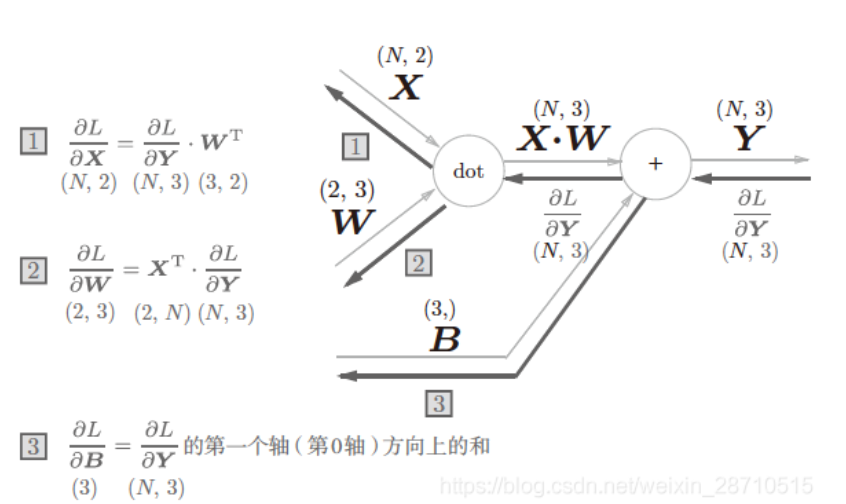

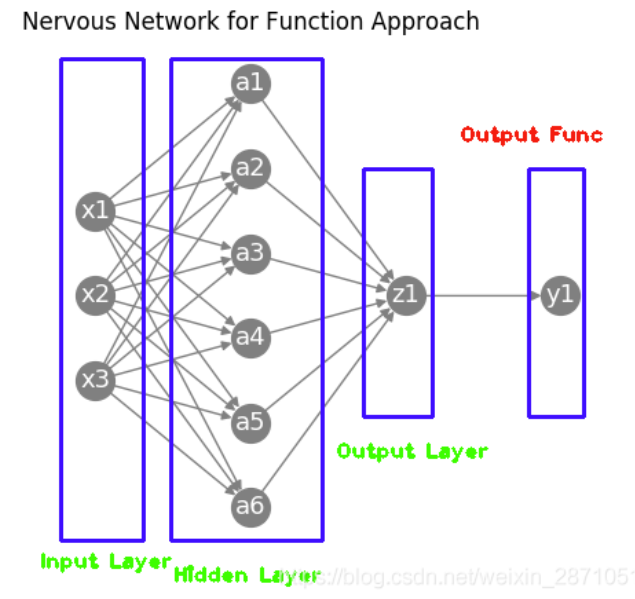

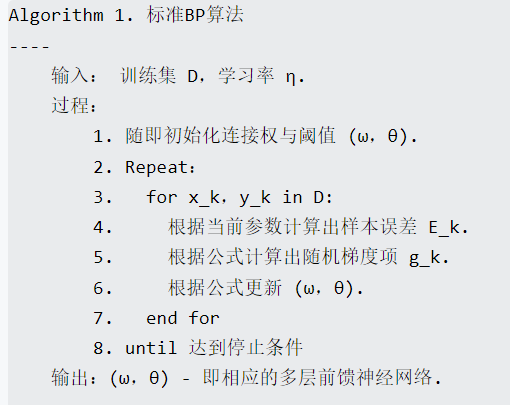

In [52]:
import numpy as np

#定义sigmoid函数 
def sigmoid(x, deriv = False):
    if(deriv == True):
        return x*(1-x)
    else:
        return 1/(1+np.exp(-x))
 
#input dataset
X = np.array([[0,0,1],
             [0,1,1],
             [1,0,1],
             [1,1,1]])
 
#output dataset
y = np.array([[0,1,1,0]]).T

#初始化权重
weight01 = 2*np.random.random((3,4)) - 1 
weight12 = 2*np.random.random((4,2)) - 1
weight23 = 2*np.random.random((2,1)) - 1

#初始化偏倚
b1 = 2*np.random.random((1,4)) - 1 
b2 = 2*np.random.random((1,2)) - 1
b3 = 2*np.random.random((1,1)) - 1
bias1=np.array([b1[0],b1[0],b1[0],b1[0]])
bias2=np.array([b2[0],b2[0],b2[0],b2[0]])
bias3=np.array([b3[0],b3[0],b3[0],b3[0]])

#开始训练
for j in range(60000):
    I0 = X
    O0=I0
    I1=np.dot(O0,weight01)+bias1
    O1=sigmoid(I1)
    I2=np.dot(O1,weight12)+bias2
    O2=sigmoid(I2)
    I3=np.dot(O2,weight23)+bias3
    O3=sigmoid(I3)

    f3_error = y-O3       
 
    if(j%10000) == 0:
        print ("Error:"+str(np.mean(f3_error)))

    
    

    f3_delta = f3_error*sigmoid(O3,deriv = True)
 
    f2_error = f3_delta.dot(weight23.T)
 
    f2_delta = f2_error*sigmoid(O2,deriv = True)
 
    f1_error = f2_delta.dot(weight12.T)     
 
    f1_delta = f1_error*sigmoid(O1,deriv = True)


    weight23 += O2.T.dot(f3_delta) #调整权重
    weight12 += O1.T.dot(f2_delta)
    weight01 += O0.T.dot(f1_delta)

    bias3 += f3_delta #调整偏倚
    bias2 += f2_delta
    bias1 += f1_delta
    
print ("outout after Training:")
print (O3)

Error:-0.06793829990208597
Error:-0.0006559444804762433
Error:-0.0004692533477729777
Error:-0.0003812004143042962
Error:-0.00032692645863784836
Error:-0.0002891012988700683
outout after Training:
[[0.00267282]
 [0.99786286]
 [0.99784973]
 [0.00265774]]


## 预测

http://t.csdn.cn/iDYkJ

In [71]:
import numpy as np
 
def loaddataset(filename):
    """读取数据"""
    #打开文件
    fp=open(filename)
    #存放数据
    dataset=[]
    #存放标签
    labelset=[]
    #读取每行数据
    for i in fp.readlines():
        #处理数据多余空格
        a=i.strip().split()
        #每个数据行的最后一个是标签
        dataset.append([float(j) for j in a[:len(a)-1]])
        labelset.append(int(float(a[-1])))
    return dataset,labelset
 
def parameter_initialization(x,y,z):
    """x为输入层神经元个数，y为隐层神经元个数，z输出层神经元个数"""
	#隐层阈值
    value1 = np.random.randint(-5, 5, (1, y)).astype(np.float64)
    #输出层阈值
    value2 = np.random.randint(-5, 5, (1, z)).astype(np.float64)
	#输入层与隐层的连接权重
    weight1 = np.random.randint(-5, 5, (x, y)).astype(np.float64)
	#隐层与输出层的连接权重
    weight2 = np.random.randint(-5, 5, (y, z)).astype(np.float64)
    return weight1, weight2, value1, value2
 
def sigmoid(z):
    """激励函数"""
    return 1 / (1 + np.exp(-z))

def trainning(dataset, labelset, weight1, weight2, value1, value2):
	#x为步长
    x = 0.01 #学习率
    for i in range(len(dataset)):
		#输入数据
        inputset = np.mat(dataset[i]).astype(np.float64)
		#数据标签
        outputset = np.mat(labelset[i]).astype(np.float64)
		#隐层输入
        input1 = np.dot(inputset, weight1).astype(np.float64)
		#隐层输出
        output2 = sigmoid(input1 - value1).astype(np.float64)
		#输出层输入
        input2 = np.dot(output2, weight2).astype(np.float64)
		#输出层输出
        output3 = sigmoid(input2 - value2).astype(np.float64)
        #更新公式由矩阵运算表示
        a = np.multiply(output3, 1 - output3)
        g = np.multiply(a, outputset - output3)
        b = np.dot(g, np.transpose(weight2))
        c = np.multiply(output2, 1 - output2)
        e = np.multiply(b, c)
        value1_change = -x * e
        value2_change = -x * g
        weight1_change = x * np.dot(np.transpose(inputset), e)
        weight2_change = x * np.dot(np.transpose(output2), g)
        #更新参数
        value1 += value1_change
        value2 += value2_change
        weight1 += weight1_change
        weight2 += weight2_change
    return weight1, weight2, value1, value2
 
def testing(dataset, labelset, weight1, weight2, value1, value2):
	#记录预测正确的个数
    rightcount = 0
    for i in range(len(dataset)):
		#计算每一个样例通过该神经网路后的预测值
        inputset = np.mat(dataset[i]).astype(np.float64)
        outputset = np.mat(labelset[i]).astype(np.float64)
        output2 = sigmoid(np.dot(inputset, weight1) - value1)
        output3 = sigmoid(np.dot(output2, weight2) - value2)
        #确定其预测标签
        if output3 > 0.5:
            flag = 1
        else:
            flag = 0
        if labelset[i] == flag:
            rightcount += 1
		#输出预测结果
        print("预测为%d   实际为%d"%(flag, labelset[i]))
	#返回正确率
    return rightcount / len(dataset)
 
def main():
    #读取训练样本数据并且进行样本划分
    dataset, labelset = loaddataset('E:/jupyterDir/horseColicTraining.txt') 
    #读取测试样本数据并且进行样本划分
    dataset1, labelset1 = loaddataset('E:/jupyterDir/horseColicTest.txt')
    #得到初始化的待估参数的值
    weight1, weight2, value1, value2 = parameter_initialization(len(dataset[0]), len(dataset[0]), 1)
    #迭代次数为1500次，迭代次数一般越大准确率越高，但是其运行时间也会增加
    for i in range(1500):
        #获得对所有训练样本训练迭代一次后的待估参数
        weight1, weight2, value1, value2 = trainning(dataset, labelset, weight1, weight2, value1, value2)
    #对测试样本进行测试，并且得到正确率
    rate = testing(dataset1, labelset1, weight1, weight2, value1, value2)
    print("正确率为%f" % (rate))
    
if __name__ == '__main__':
    main()

预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为0
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为0
预测为1   实际为1
预测为0   实际为0
预测为1   实际为0
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为0
预测为0   实际为0
预测为1   实际为0
预测为1   实际为1
预测为1   实际为1
预测为1   实际为0
预测为1   实际为0
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为0   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为0   实际为0
预测为1   实际为1
预测为1   实际为0
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为0   实际为1
预测为0   实际为1
预测为1   实际为0
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为1
预测为1   实际为0
预测为1   实际为0
预测为1   实际为0
预测为1   实际为0
预测为0   实际为1
预测为1   实际为1
预测为1   实际为1
预测为0   实际为1
预测为1   实际为0
预测为1   实际为1
预测为0   实际为1
预测为1   实际为1
预测为1   实际为0
预测为1   实际为1
预测为1   实际为1
预测为1   实际为0
预测为1   实际为1
预测为1   实际为0
正确率为0.656716


# 9.Hopfield神经网络求解tsp

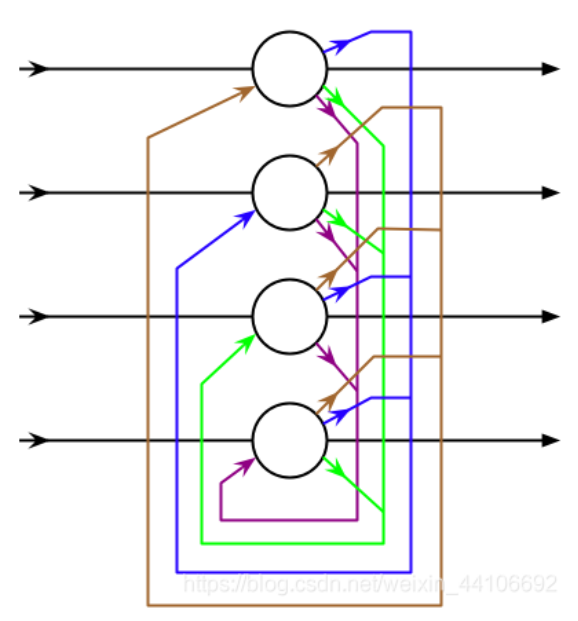

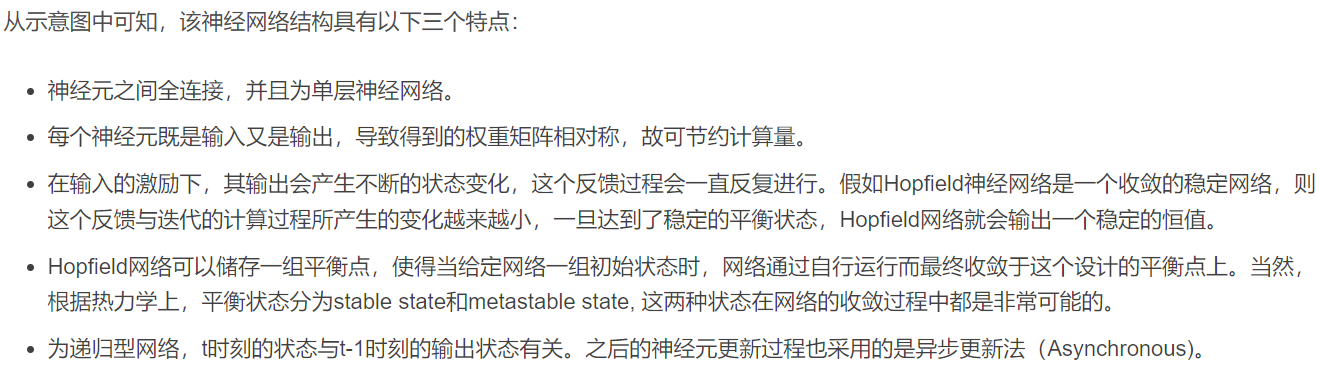

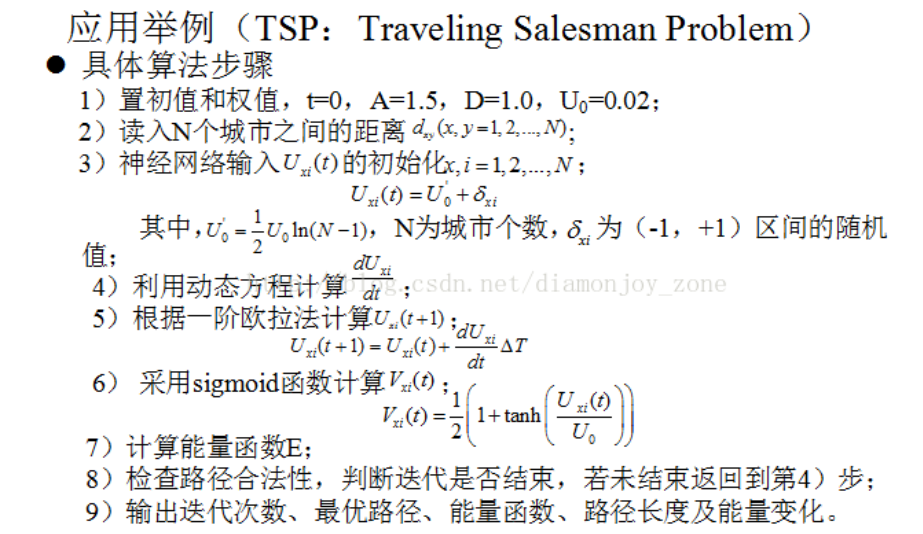

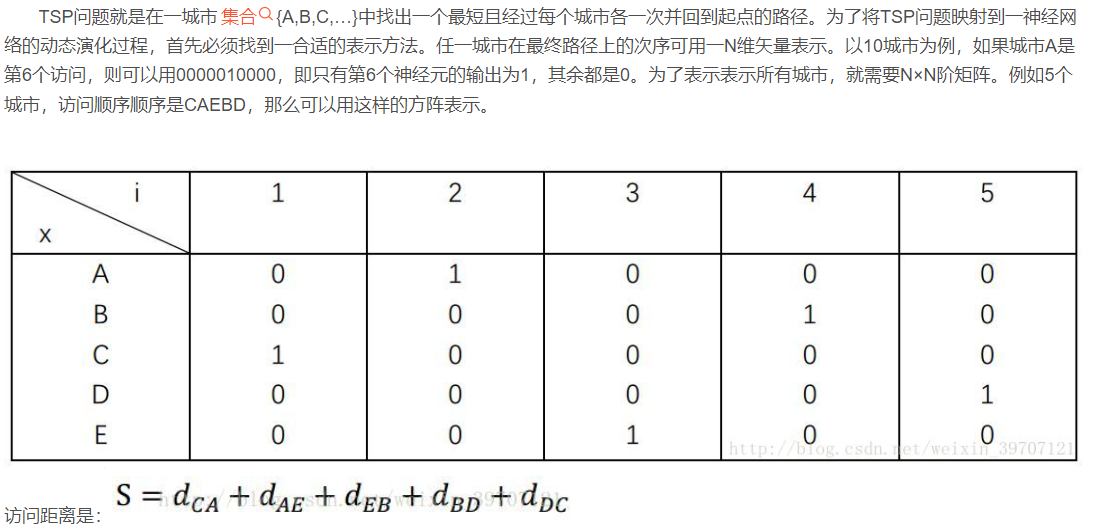

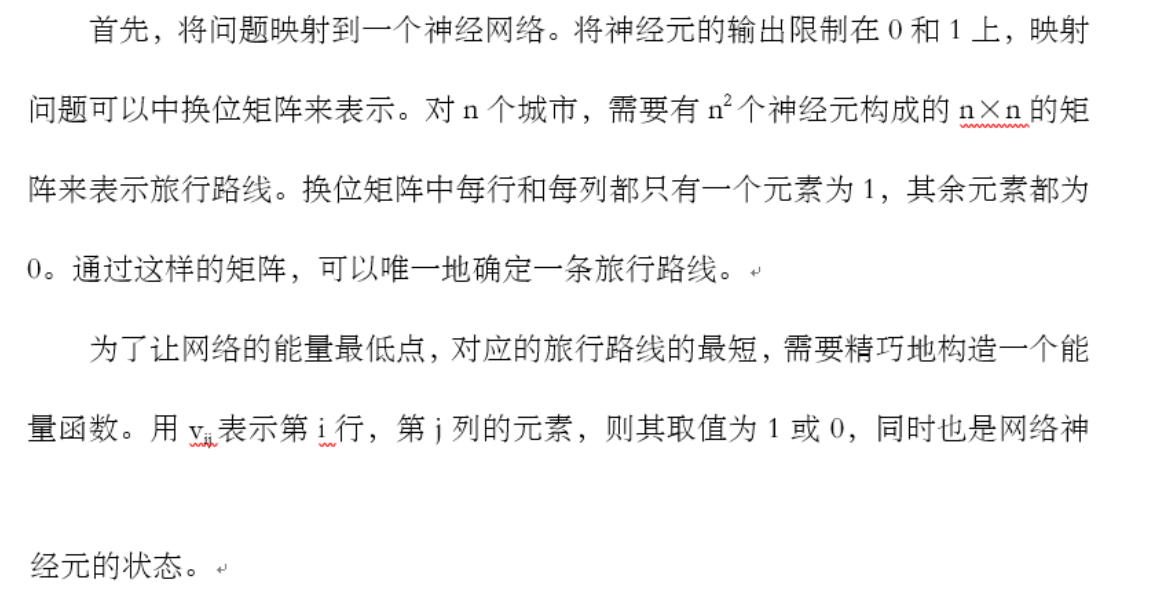

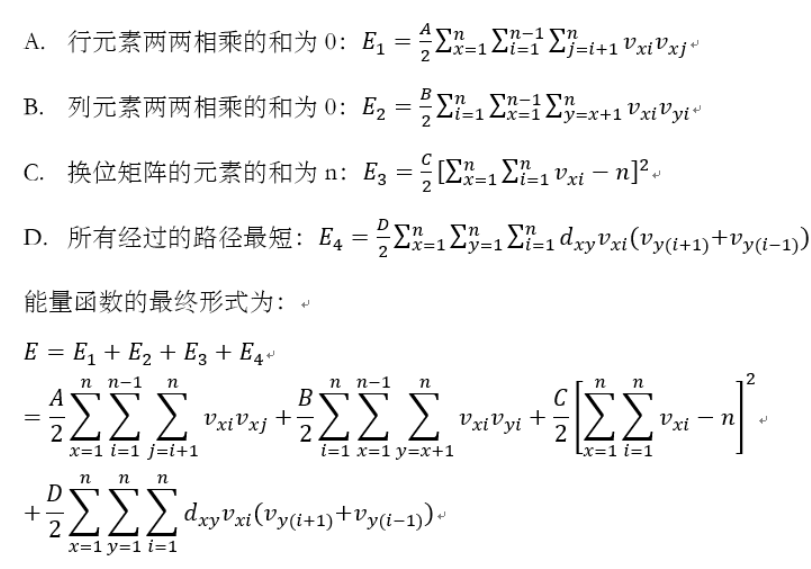

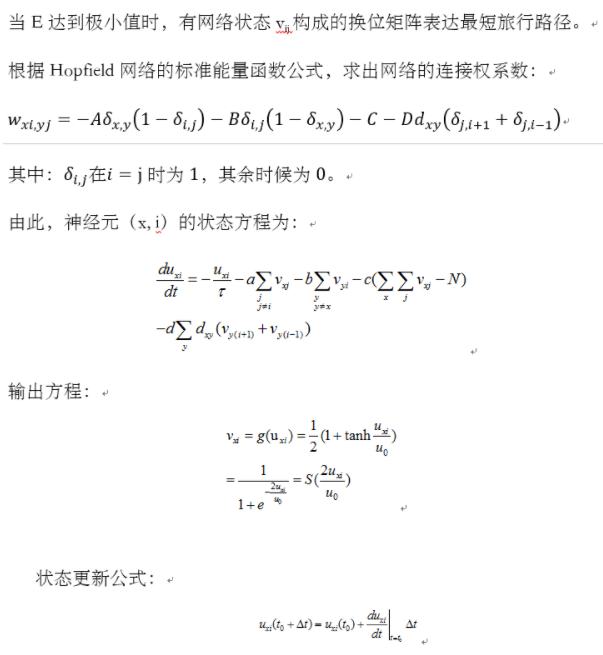

'\n连续型——Hopfield神经网络求解TSP\n1、初始化权值（A,D,U0）\n2、计算N个城市的距离矩阵dxy\n3、初始化神经网络的输入电压Uxi和输出电压Vxi\n4、利用动力微分方程计算：dUxi/dt\n5、由一阶欧拉方法更新计算：Uxi(t+1) = Uxi(t) + dUxi/dt * step\n6、由非线性函数sigmoid更新计算：Vxi(t) = 0.5 * (1 + th(Uxi/U0))\n7、计算能量函数E\n8、检查路径是否合法\n'

[None, None, None, None, None, None, None, None]

第47次迭代找到的次优解距离为：24.374513324982086，能量为：57.4125449017571，路径为：
e,c,h,d,b,f,a,g,e


[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

第160次迭代找到的次优解距离为：23.788726887355182，能量为：228.5138840525257，路径为：
e,c,b,d,h,f,a,g,e


[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

第185次迭代找到的次优解距离为：21.064655030150888，能量为：290.4845530592135，路径为：
a,c,b,d,h,f,e,g,a


[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

第543次迭代找到的次优解距离为：19.902377369982506，能量为：319.8838161721134，路径为：
h,c,b,d,f,e,g,a,h


[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

第3963次迭代找到的次优解距离为：19.14218233270955，能量为：266.5197066353279，路径为：
e,d,f,g,a,b,c,h,e


[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

第4011次迭代找到的次优解距离为：18.32690062720235，能量为：197.0937207645148，路径为：
e,d,g,f,a,b,c,h,e


[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

第5588次迭代找到的次优解距离为：16.46284073991415，能量为：148.26933327178435，路径为：
d,e,g,f,b,h,c,a,d


[None, None, None, None, None, None, None, None, None]

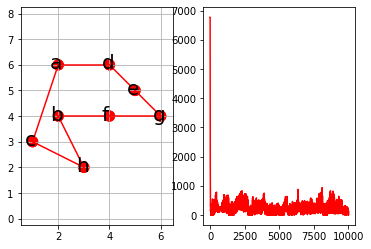

In [40]:
'''
连续型——Hopfield神经网络求解TSP
1、初始化权值（A,D,U0）
2、计算N个城市的距离矩阵dxy
3、初始化神经网络的输入电压Uxi和输出电压Vxi
4、利用动力微分方程计算：dUxi/dt
5、由一阶欧拉方法更新计算：Uxi(t+1) = Uxi(t) + dUxi/dt * step
6、由非线性函数sigmoid更新计算：Vxi(t) = 0.5 * (1 + th(Uxi/U0))
7、计算能量函数E
8、检查路径是否合法
'''
import numpy as np
from matplotlib import pyplot as plt

def price_cn(vec1, vec2):
    """代价函数（具有三角不等式性质）"""
    return np.linalg.norm(np.array(vec1) - np.array(vec2))  #代价函数l2范数表示
def calc_distance(path):
    """计算路线长度"""
    dis = 0.0
    for i in range(len(path) - 1):
        dis += distance[path[i]][path[i+1]]
    return dis

def get_distance(citys):
    """得到城市之间的距离矩阵"""
    N = len(citys)
    distance = np.zeros((N, N))
    for i, curr_point in enumerate(citys):
        line = []
        [line.append(price_cn(curr_point, other_point)) if i != j else line.append(0.0) for j, other_point in enumerate(citys)]
        distance[i] = line
    return distance

def calc_du(V, distance):
    """动态方程计算微分方程du"""
    a = np.sum(V, axis=0) - 1  # 按列相加
    b = np.sum(V, axis=1) - 1  # 按行相加
    t1 = np.zeros((N, N))
    t2 = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            t1[i, j] = a[j]
    for i in range(N):
        for j in range(N):
            t2[j, i] = b[j]
    # 将第一列移动到最后一列
    c_1 = V[:, 1:N]
    c_0 = np.zeros((N, 1))
    c_0[:, 0] = V[:, 0]
    c = np.concatenate((c_1, c_0), axis=1)
    c = np.dot(distance, c)
    return -A * (t1 + t2) - D * c
# 更新神经网络的输入电压U
def calc_U(U, du, step):
    return U + du * step
# 更新神经网络的输出电压V
def calc_V(U, U0):
    return 1 / 2 * (1 + np.tanh(U / U0))
# 计算当前网络的能量
def calc_energy(V, distance):
    t1 = np.sum(np.power(np.sum(V, axis=0) - 1, 2))
    t2 = np.sum(np.power(np.sum(V, axis=1) - 1, 2))
    idx = [i for i in range(1, N)]
    idx = idx + [0]
    Vt = V[:, idx]
    t3 = distance * Vt
    t3 = np.sum(np.sum(np.multiply(V, t3)))
    e = 0.5 * (A * (t1 + t2) + D * t3)
    return e
# 检查路径的正确性
def check_path(V):
    newV = np.zeros([N, N])
    route = []
    for i in range(N):
        mm = np.max(V[:, i])
        for j in range(N):
            if V[j, i] == mm:
                newV[j, i] = 1
                route += [j]
                break
    return route, newV
# 可视化画出哈密顿回路和能量趋势
def draw_H_and_E(citys, H_path, energys):
    fig = plt.figure()
    # 绘制哈密顿回路
    ax1 = fig.add_subplot(121)
    plt.xlim(0, 7)
    plt.ylim(0, 7)
    for (from_, to_) in H_path:
        p1 = plt.Circle(citys[from_], 0.2, color='red')
        p2 = plt.Circle(citys[to_], 0.2, color='red')
        ax1.add_patch(p1)
        ax1.add_patch(p2)
        ax1.plot((citys[from_][0], citys[to_][0]), (citys[from_][1], citys[to_][1]), color='red')
        ax1.annotate(s=chr(97 + to_), xy=citys[to_], xytext=(-8, -4), textcoords='offset points', fontsize=20)
    ax1.axis('equal')
    ax1.grid()
    # 绘制能量趋势图
    ax2 = fig.add_subplot(122)
    ax2.plot(np.arange(0, len(energys), 1), energys, color='red')
    plt.show()
if __name__ == '__main__':
    citys = np.array([[2, 6], [2, 4], [1, 3], [4, 6], [5, 5], [4, 4], [6, 4], [3, 2]])
    distance = get_distance(citys)
    N = len(citys)
    # 设置初始值
    A = N * N
    D = N / 2
    U0 = 0.0009  # 初始电压
    step = 0.0001  # 步长
    num_iter = 10000  # 迭代次数
    # 初始化神经网络的输入状态（电路的输入电压U）
    U = 1 / 2 * U0 * np.log(N - 1) + (2 * (np.random.random((N, N))) - 1)
    # 初始化神经网络的输出状态（电路的输出电压V）
    V = calc_V(U, U0)
    energys = np.array([0.0 for x in range(num_iter)])  # 每次迭代的能量
    best_distance = np.inf  # 最优距离
    best_route = []  # 最优路线
    H_path = []  # 哈密顿回路
    # 开始迭代训练网络
    for n in range(num_iter):
        # 利用动态方程计算du
        du = calc_du(V, distance)
        # 由一阶欧拉法更新下一个时间的输入状态（电路的输入电压U）
        U = calc_U(U, du, step)
        # 由sigmoid函数更新下一个时间的输出状态（电路的输出电压V）
        V = calc_V(U, U0)
        # 计算当前网络的能量E
        energys[n] = calc_energy(V, distance)
        # 检查路径的合法性
        route, newV = check_path(V)
        if len(np.unique(route)) == N:
            route.append(route[0])
            dis = calc_distance(route)
            if dis < best_distance:
                H_path = []
                best_distance = dis
                best_route = route
                [H_path.append((route[i], route[i + 1])) for i in range(len(route) - 1)]
                print('第{}次迭代找到的次优解距离为：{}，能量为：{}，路径为：'.format(n, best_distance, energys[n]))
                [print(chr(97 + v), end=',' if i < len(best_route) - 1 else '\n') for i, v in enumerate(best_route)]
    if len(H_path) > 0:
        draw_H_and_E(citys, H_path, energys)
    else:
        print('没有找到最优解')


# 10.Hopfield重构图像

Text(0.5, 1.0, 'train picture1')

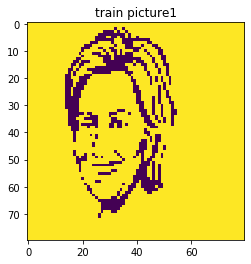

weight matrix is prepared!!!!!


Text(0.5, 1.0, 'test picture1')

Text(0.5, 1.0, 'recall1')

Text(0, 0.5, 'energy')

Text(0.5, 0, 'update times')

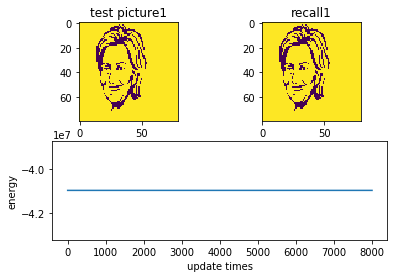

In [51]:
import numpy as np
import random
from PIL import Image
import os
import re  #使用正则表达式
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


def readImg2array(file,size, threshold= 145):
    """将jpg格式或者jpeg格式的图片转换为二值矩阵"""
    #file is jpg or jpeg pictures
    #size is a 1*2 vector,eg (40,40)
    pilIN = Image.open(file).convert(mode="L")
    pilIN= pilIN.resize(size)
    #pilIN.thumbnail(size,Image.ANTIALIAS)
    imgArray = np.asarray(pilIN,dtype=np.uint8)
    x = np.zeros(imgArray.shape,dtype=np.float)
    x[imgArray > threshold] = 1
    x[x==0] = -1
    return x

def array2img(data, outFile = None):
    """逆变换"""
    #data is 1 or -1 matrix
    y = np.zeros(data.shape,dtype=np.uint8)
    y[data==1] = 255
    y[data==-1] = 0
    img = Image.fromarray(y,mode="L")
    if outFile is not None:
        img.save(outFile)
    return img

def mat2vec(x):
    """利用x.shape得到矩阵x的每一维个数，从而得到m个元素的全零向量。
    将x按i\j顺序赋值给向量tmp1. 最后得到从矩阵转换的向量。
    """
    #x is a matrix
    m = x.shape[0]*x.shape[1]
    tmp1 = np.zeros(m)

    c = 0
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            tmp1[c] = x[i,j]
            c +=1
    return tmp1

def create_W_single_pattern(x):
    """创建权重矩阵"""
    # x 是向量
    if len(x.shape) != 1:
        print ("The input is not vector")
        return
    else:
        w = np.zeros([len(x),len(x)])
        for i in range(len(x)):
            for j in range(i,len(x)):
                if i == j:
                    w[i,j] = 0
                else:
                    w[i,j] = x[i]*x[j]
                    w[j,i] = w[i,j]
    return w


def update_asynch(weight,vector,theta=0.5,times=100):
    """对神经元的随机升级
    利用异步更新，以及前面提到的迭代公式，从而获取更新后的神经元向量以及系统能量。
    """
    energy_ = []
    times_ = []
    energy_.append(energy(weight,vector))
    times_.append(0)
    for i in range(times):
        length = len(vector)
        update_num = random.randint(0,length-1)
        next_time_value = np.dot(weight[update_num][:],vector) - theta
        if next_time_value>=0:
            vector[update_num] = 1
        if next_time_value<0:
            vector[update_num] = -1
        times_.append(i)
        energy_.append(energy(weight,vector))
    
    return (vector,times_,energy_)
                
def energy(weight,x,bias=0):
    """计算每一次迭代后的系统能量"""
#weight: m*m weight matrix
#x: 1*m data vector
#bias: outer field
    energy = -x.dot(weight).dot(x.T)+sum(bias*x)
    # E is a scalar
    return energy

#main 
#import training picture
size_global =(80,80)
threshold_global = 60

train_paths = []
train_path = "E:/jupyterDir/"
for i in os.listdir(train_path):
    if re.match(r'[0-9 a-z A-Z-_]*.jp[e]*g',i):
        train_paths.append(train_path+i)
flag = 0
for path in train_paths:
    matrix_train = readImg2array(path,size = size_global,threshold=threshold_global)
    vector_train = mat2vec(matrix_train)
    plt.imshow(array2img(matrix_train))
    plt.title("train picture"+str(flag+1))
    plt.show()
    if flag == 0:
        w_ = create_W_single_pattern(vector_train)
        flag = flag +1
    else:
        w_ = w_ +create_W_single_pattern(vector_train)
        flag = flag +1

w_ = w_/flag
print("weight matrix is prepared!!!!!")

## import test data
test_paths = []
test_path = "E:/jupyterDir/"
for i in os.listdir(test_path):
    if re.match(r'[0-9 a-z A-Z-_]*.jp[e]*g',i):
        test_paths.append(test_path+i)
num = 0
for path in test_paths:
    num = num+1
    matrix_test = readImg2array(path,size = size_global,threshold=threshold_global)
    vector_test = mat2vec(matrix_test)
    plt.subplot(221)
    plt.imshow(array2img(matrix_test))
    plt.title("test picture"+str(num))


  #plt.show()
oshape = matrix_test.shape
aa = update_asynch(weight=w_,vector=vector_test,theta = 0.5 ,times=8000)
vector_test_update = aa[0]
matrix_test_update = vector_test_update.reshape(oshape)
    #matrix_test_update.shape
    #print(matrix_test_update)
plt.subplot(222)
plt.imshow(array2img(matrix_test_update))
plt.title("recall"+str(num))

    #plt.show()
plt.subplot(212)
plt.plot(aa[1],aa[2])
plt.ylabel("energy")
plt.xlabel("update times")
    
plt.show()


# 11.实例1 GA解最大值

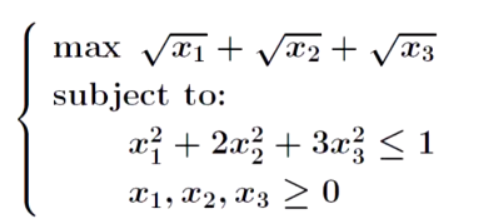

In [38]:
#max sqrt(x[1])+sqrt(x[2])+sqrt(x[3])  
#s.t. x[1]**2+2*(x[2]**2)+3*(x[3]**2)<=1
#     x[1],x[2],x[3]>=0

import numpy as np
import random

N=3  #x1,x2,x3
TYPE=1  #解极大化问题TYPE=+1
GEN=400  #最大迭代次数400次
POP_SIZE=30  #群体规模30
P_MUTATION=0.2  #变异概率
P_CROSSOVER=0.3  #交叉概率

CHROMOSOME=np.zeros([POP_SIZE+1,N+1])  #染色体
OBJECTIVE=np.zeros(POP_SIZE+1)  #目标值
q=np.zeros(POP_SIZE+1)

def myu(a,b):
    """[a,b]区间随机生成数字"""
    if(a>b):
        print("第一个参数应该比第二个参数小才行！")
    else:
        y=random.random()
        return a+(b-a)*y
    
def objective_function():
    x=np.zeros(N+1)
    for i in range(1,POP_SIZE+1):
        for j in range(1,N+1):
            x[j]=CHROMOSOME[i][j]
        OBJECTIVE[i]=x[1]**0.5+x[2]**0.5+x[3]**0.5
    OBJECTIVE[0]=OBJECTIVE[1] #最优解先存储 0位置存储最优解 要更新的
    
def constraint_check(x):
    """约束条件"""
    #s.t. x[1]**2+2*(x[2]**2)+3*(x[3]**2)<=1  x[1],x[2],x[3]>=0
    for n in range(1,N+1):
        if(x[n]<0):
            return 0
    a=x[1]*x[1]+2*x[2]*x[2]+3*x[3]*x[3]
    if(a>1):
        return 0
    return 1

def initialization():
    """初始化"""
    for i in range(1,POP_SIZE+1):
        x=np.random.rand(N+1)  #返回一组服从标准正态分布的随机样本值。
        while(constraint_check(x)==0):
            for j in range(1,N+1):
                x[j]=myu(0,1)
        CHROMOSOME[i]=x  #初始化染色体

def evaluation(gen):
    """排序"""
    objective_function()
    if(gen==0):
        OBJECTIVE[0]=OBJECTIVE[1]
        CHROMOSOME[0]=CHROMOSOME[1]
        
    for i in range(POP_SIZE):
        label=0
        a=OBJECTIVE[i]
        for j in range(i+1,POP_SIZE+1):
            if((TYPE*a)<(TYPE*OBJECTIVE[j])):
                a=OBJECTIVE[j]
                label=j #存储当前最优解位置
            else:
                continue
        if(label!=0):
            a=OBJECTIVE[i]
            OBJECTIVE[i]=OBJECTIVE[label]
            OBJECTIVE[label]=a
            for j in range(1,N+1):
                b=CHROMOSOME[i][j]
                CHROMOSOME[i][j]=CHROMOSOME[label][j]
                CHROMOSOME[label][j]=b

def selection():
    """选择"""
    temp=np.zeros([POP_SIZE+1,N+1])  #临时存储作用，用于交换做过度
    for i in range(1,POP_SIZE+1):
        r=myu(0,q[POP_SIZE])  #随机生成区间内的数
        for j in range(0,POP_SIZE+1):
            if(r<=q[j]): #选择
                for k in range(1,N+1):
                    temp[i][k]=CHROMOSOME[j][k]  #存储被选择的染色体
                break
    for i in range(1,POP_SIZE+1):
        CHROMOSOME[i]=temp[i]
        
def crossover():
    """交叉"""
    pop=int(POP_SIZE/2) #为了一次选两个染色体 
    for i in range(1,pop+1):
        if(myu(0,1)>P_CROSSOVER):
            continue
        #选两个
        j=int(myu(1,POP_SIZE))
        jj=int(myu(1,POP_SIZE))
        r=myu(0,1) #随机生成一个数
        x=r*CHROMOSOME[j]+(1-r)*CHROMOSOME[jj]  #凸组合运算
        y=r*CHROMOSOME[jj]+(1-r)*CHROMOSOME[j]
        if(constraint_check(x)==1): #判断是否符合约束条件
            CHROMOSOME[j]=x
        if(constraint_check(y)==1):
            CHROMOSOME[jj]=y
            
def mutation():
    INFTY=10 #步长
    precision=0.0001  #精度
    direction=np.zeros(N+1)  #变化方向
    y=np.zeros(N+1)
    
    for i in range(1,POP_SIZE+1):
        if(myu(0,1)>P_MUTATION):
            continue
        x=CHROMOSOME[i] #用于变异 防止CHROMOSOME变化
        for k in range(1,N+1):
            if(myu(0,1)<0.5):
                direction[k]=myu(-1,1)
            else:
                direction[k]=0
            infty=myu(0,INFTY)
            while(infty>precision):
                for j in range(1,N+1):
                    y[j]=x[j]+infty*direction[j]  #x变异
                if(constraint_check(y)==1): #判断y是不是可行解
                    CHROMOSOME[i]=y
                    break
                infty=myu(0,infty) #继续缩小步长
                
#main
random.seed() 
q[0]=0.05
a=0.05
for i in range(1,POP_SIZE+1):
    a=a*0.95
    q[i]=q[i-1]+a
initialization()
evaluation(0)
for i in range(1,GEN+1):
    selection()
    crossover()
    mutation()
    evaluation(i)
    if(i%40==0):
        print('Generation no. %s, Objective=%3.4f' %(i,OBJECTIVE[0]))
        
aa=[]
for j in range(1,N+1):
    aa.append(CHROMOSOME[0][j])
cc=str(aa)

print('最优解路径是：')
print(aa)
print('最优解值是：%3.4f' %OBJECTIVE[0])

wfile=open("result_fuction.txt",'w')
wfile.write('\n最优解路径是：\n')
wfile.write(cc)
wfile.write('\n最优解值是：%3.4f\n' %OBJECTIVE[0])
wfile.close()

Generation no. 40, Objective=1.9802
Generation no. 80, Objective=1.9802
Generation no. 120, Objective=1.9803
Generation no. 160, Objective=1.9803
Generation no. 200, Objective=1.9804
Generation no. 240, Objective=1.9804
Generation no. 280, Objective=1.9804
Generation no. 320, Objective=1.9804
Generation no. 360, Objective=1.9804
Generation no. 400, Objective=1.9804
最优解路径是：
[0.6388792998523218, 0.4002718424572529, 0.30077506207129007]
最优解值是：1.9804


# 12.实例2 GA解TSP问题

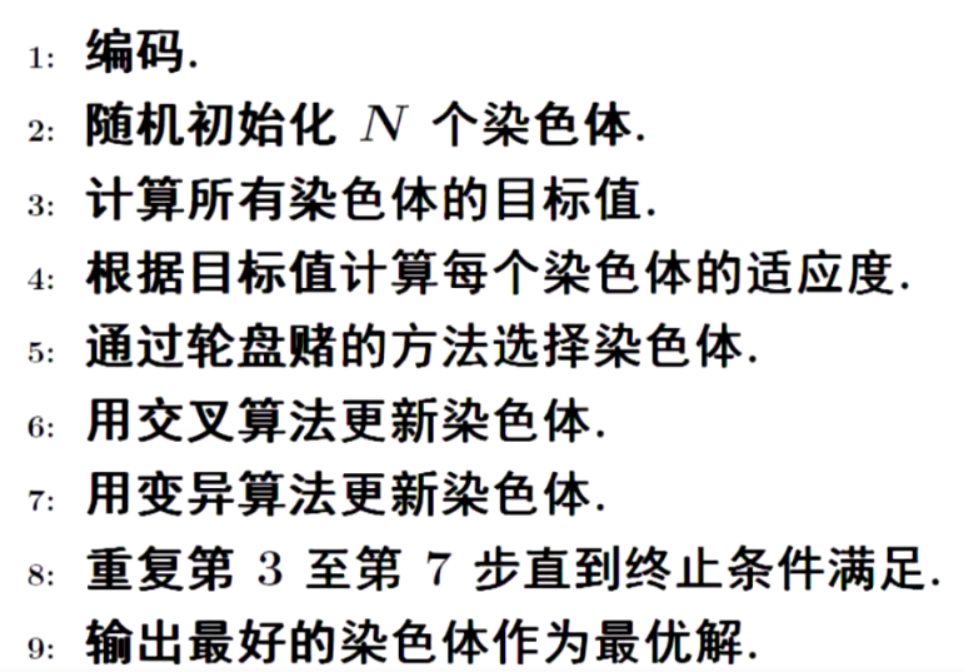

Gerenation no. 30,Distance=670.5454
Gerenation no. 60,Distance=507.3227
Gerenation no. 90,Distance=504.3688
Gerenation no. 120,Distance=482.6792
Gerenation no. 150,Distance=477.9324
Gerenation no. 180,Distance=477.9324
Gerenation no. 210,Distance=477.9324
Gerenation no. 240,Distance=477.9324
Gerenation no. 270,Distance=477.9324
Gerenation no. 300,Distance=477.9324
Gerenation no. 330,Distance=477.9324
Gerenation no. 360,Distance=477.9324
Gerenation no. 390,Distance=477.9324
Gerenation no. 420,Distance=477.9324
Gerenation no. 450,Distance=477.9324
Gerenation no. 480,Distance=477.9324
Gerenation no. 510,Distance=477.9324
Gerenation no. 540,Distance=477.9324
Gerenation no. 570,Distance=477.9324
Gerenation no. 600,Distance=477.9324
Best Route is:
4->25->27->5->19->1->9->13->15->2->20->28->21->29->6->18->23->11->26->8->7->3->30->17->16->24->22->14->12->10
Best distance=477.9324


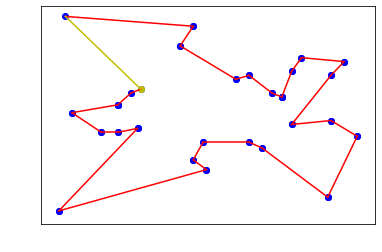

In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt

N=30  #城市数目30个
TYPE=-1  #解极小化问题TYPE=-1，解极大化问题TYPE=+1
GEN=600  #最大迭代次数600次
POP_SIZE=30  #群体规模30
P_MUTATION=0.4  #变异概率
P_CROSSOVER=0.6  #交叉概率

CHROMOSOME=np.zeros([POP_SIZE+1,N+1],dtype=int)  #染色体
OBJECTIVE=np.zeros(POP_SIZE+1)  #路线
d=np.zeros([N+1,N+1])  #距离
q=np.zeros(POP_SIZE+1)

def loadDatadet(infile,k):
    try:
        with open(infile,'r') as f:
            #读取tsp_city.txt
            sourceInLine=f.readlines()  #读取文件所有行
            dataset=[]
            for line in sourceInLine:
                temp1=line.strip('\n')   #删除'\n'
                temp2=temp1.split()  #以空格为分隔符
                dataset.append(temp2)
        for i in range(0,len(dataset)):
            for j in range(k):
                dataset[i].append(float(dataset[i][j]))
            del(dataset[i][0:k])
        return dataset
    except IOError:
        print("File not found")

def myu(a,b):
    """[a,b]区间随机生成数字"""
    if(a>b):
        print("第一个参数应该比第二个参数小才行！")
    else:
        y=random.random()
        return a+(b-a)*y

def objective_function():
    x=np.zeros(N+2,dtype=int)
    for i in range(1,POP_SIZE+1):
        for j in range(1,N+1):
            x[j]=CHROMOSOME[i][j]
        x[N+1]=x[1]
        OBJECTIVE[i]=0
        for j in range(1,N+1):
            OBJECTIVE[i]=OBJECTIVE[i]+d[x[j]][x[j+1]]
            
def input_data():
    global infile
    global infile1
    infile='tsp_city.txt'
    k=2
    infile1=loadDatadet(infile,k)
    infile=np.zeros([N+1,k])
    for i in range(1,N+1):
        infile[i]=infile1[i]
    infile[N][0]=infile[0][0]
    infile[N][1]=infile[0][1]
    
    #计算距离
    for i in range(1,N+1):
        for j in range(1,N+1):
            d[i][j]=(pow(infile[i][0]-infile[j][0],2)+pow(infile[i][1]-infile[j][1],2))**0.5

def initialization():
    """初始化"""
    x=np.linspace(1,N,N)
    y=np.array(x,dtype=int)
    for i in range(1,POP_SIZE+1):
        a=np.random.permutation(y) #随机排序
        for j in range(1,N+1):
            CHROMOSOME[i][j]=a[j-1]  #染色体初始化
            
def evaluation(gen):
    """把染色体按照目标从小到大排列"""
    objective_function()
    if(gen==0):
        OBJECTIVE[0]=OBJECTIVE[1]
        CHROMOSOME[0]=CHROMOSOME[1]
        #当前最优解存储在第0位
    
    for i in range(POP_SIZE):
        label=0
        a=OBJECTIVE[i]
        for j in range(i+1,POP_SIZE+1):
            if((TYPE*a)<(TYPE*OBJECTIVE[j])):
                a=OBJECTIVE[j]
                label=j
            else:
                continue
        if(label!=0):
            a=OBJECTIVE[i]
            OBJECTIVE[i]=OBJECTIVE[label]
            OBJECTIVE[label]=a
            for j in range(i,N+1):
                b=CHROMOSOME[i][j]
                CHROMOSOME[i][j]=CHROMOSOME[label][j]
                CHROMOSOME[label][j]=b
      
def selection():
    """选择"""
    temp=np.zeros([POP_SIZE+1,N+1],dtype=int)  #记录数据
    for i in range(1,POP_SIZE+1):
        r=myu(0,q[POP_SIZE])  #随机生成数
        for j in range(0,POP_SIZE+1):
            if(r<q[j]):   
                #第j位被选择
                for k in range(1,N+1):
                    temp[i][k]=CHROMOSOME[j][k]
                break
    for i in range(1,POP_SIZE+1):
        for k in range(1,N+1):
            CHROMOSOME[i][k]=temp[i][k]
            
def crossover():
    """交叉"""
    TEMP=np.zeros([POP_SIZE+1,N+1],dtype=int) #存储交换的目的
    pop=int(POP_SIZE/2)
    #/2的目的是 一次选两对 则30个染色体
    
    for i in range(1,pop+1):
        if(myu(0,1)>P_CROSSOVER):
            continue
        j=int(myu(1,POP_SIZE))
        jj=int(myu(1,POP_SIZE))
        #选两个染色体
        
        for k in range(1,N+1):
            TEMP[j][k]=CHROMOSOME[j][k] #存储要交叉的染色体
            
        s=int(myu(1,N))  #随机产生交叉位
        
        label=int(0)  #m从第一位开始
        for k in range(s+1,N+1):
            for m in range(label+1,N+1):
                count=int(0)
                for n in range(1,s+1): #1-s 作比较
                    if(CHROMOSOME[jj][m]==CHROMOSOME[j][n]):
                        count=1
                if(count==0):
                    label=m #记录要变得位置
                    break
            CHROMOSOME[j][k]=CHROMOSOME[jj][label]
            
        label=int(0)
        for k in range(s+1,N+1):
            for m in range(label+1,N+1):
                count=int(0)
                for n in range(1,s+1):
                    if(TEMP[j][m]==CHROMOSOME[jj][n]):
                        count=1
                if(count==0):
                    label=m
                    break
            CHROMOSOME[jj][k]=TEMP[j][label]
            
def mutation():
    """变异"""
    x=np.zeros(N+1,dtype=int)
    for i in range(1,POP_SIZE+1):
        if(myu(0,1)>P_MUTATION):
            continue #不变异
        #else 变异
        m=int(myu(1,N))
        n=int(myu(1,N))
        if(m>n):
            k=m
            m=n
            n=k
        for j in range(m,n+1):
            x[j]=CHROMOSOME[i][j]
        for j in range(m,n+1):
            CHROMOSOME[i][j]=x[n-j+m] #变异
            
# main
random.seed()  #改变随机生成器的种子 
q[0]=0.05
a=0.05
for i in range(1,POP_SIZE+1):
    a=a*0.95
    q[i]=q[i-1]*a
input_data()  #读取数据
initialization() #初始化
evaluation(0)  #初始化
for i in range(1,GEN+1): #按最大迭代次数操作
    selection()  #选择
    crossover()   #交叉
    mutation()  #变异
    evaluation(i)  
    if(i%30==0):
        print('Gerenation no. %s,Distance=%3.4f' %(i,OBJECTIVE[0]))  #OBJECTIVE[0]存储最优解，输出最优解即可

#记录结果
aa=[] #list
for j in range(1,N+1):
    aa.append(CHROMOSOME[0][j])
bb=[str(i) for i in aa]  #string
cc='->'.join(bb)

print('Best Route is:')
print(cc)
print('Best distance=%3.4f' %OBJECTIVE[0])

#结果写入到txt文件中
wfile=open("result_tsp_city.txt",'w')
wfile.write('\nBest Route is:\n')
wfile.write(cc)
wfile.write('\nBest distance=%3.4f\n' %OBJECTIVE[0])
wfile.close()

aa.append(aa[0])

x=[]
for i in range(N):
    x.append([infile[aa[i]][0],infile[aa[i+1]][0]])
y=[]
for i in range(N):
    y.append([infile[aa[i]][1],infile[aa[i+1]][1]])
    
for i in range(1,N):
    plt.plot(x[i],y[i],color='r')
    plt.scatter(x[i],y[i],color='b')
plt.tick_params(axis='both',labelsize=14,colors='white')
plt.scatter(infile[aa[0]][0],infile[aa[0]][1],color='y',marker='o') #出发的第一个路
plt.plot(x[0],y[0],color='y') #出发城市
plt.show()